<a href="https://www.kaggle.com/code/mohamedayman66/medical-appointments-wrangling-and-analysis?scriptVersionId=108090764" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Inroduction:
This dataset consists of the data related to the medical appointment and focus on factors would affect appearance of patients.

**Description of columns:**
01 - PatientId

Identification of a patient

02 - AppointmentID

Identification of each appointment
03 - Gender:

M (Male) or F (Female) .
04 - ApointmentDay:

The day of the actuall appointment, when they have to visit the doctor.

05 - ScheduledDay:

The day someone called or registered the appointment, this is before appointment of course.

06 - Age:

How old is the patient.

07 - Neighbourhood:

Where the appointment takes place.

08 - Scholarship:

0 or 1 , Observation, this is a broad topic, consider reading this article https://en.wikipedia.org/wiki/Bolsa_Fam%C3%ADlia

09 - Hipertension:

0 or 1 

10 - Diabetes:

0 or 1

Alcoholism:

0 or 1

Handcap:

Number of handi cap

SMS_received

0 or 1

**0 means No and 1 means Yes**

No-show

Yes (if the patient didn't show up) or No (if the patient show up)


# Importing Process:

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from datetime import date
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/noshowappointments/KaggleV2-May-2016.csv


In [2]:
med=pd.read_csv("/kaggle/input/noshowappointments/KaggleV2-May-2016.csv")
med.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Assessing Process:

In [3]:
med.shape

(110527, 14)

We can see here from the above cell that this dataset consisting of 110527 row and 14 columns.

My first assessing visually: that the columns name need to change beacuse they are capitlized and there is wrong spelling (Hipertension , Handcap)

My second assessing visually :that the column No-show represent if the patient appear as No and if he or she didn't represent it as Yes , i'm really not comfortable with this representions

In [4]:
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


My second assessing as result from the cell above:

1-we need to change the data type of PatientId to string ,ScheduledDay and AppointmentDay to datetime,Age and Scholarship and Hipertension and Diabetes and Alcoholism and SMS_received and No-show to Boolean 

2-We don't need AppointmentID column i think it's useless so we will drop it later 

In [5]:
med.duplicated().any()

False

In [6]:
med.isnull().any()

PatientId         False
AppointmentID     False
Gender            False
ScheduledDay      False
AppointmentDay    False
Age               False
Neighbourhood     False
Scholarship       False
Hipertension      False
Diabetes          False
Alcoholism        False
Handcap           False
SMS_received      False
No-show           False
dtype: bool

There's no any duplicate rows or any nan values so it's great news!

In [7]:
med.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [8]:
med.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


My third assessing is :

The minimum age in age column is negtive 1 so we will make sure that the minimum value is not less than zero (by the way zero age mean newborn who are months old beacuse the scale in this column by years not months)

Actully i wanna cheak the handcap column let's see

In [9]:
med["Handcap"].value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

mmmm....

We can see here that this column contain the number of the handicap which the person have and if he or she doesn't have any they will represent as zero 

actually i feel if we transformed this column to categorical data it will help us more in our analysis (I mean if the value is zero it will be False and if the value is 1 or 2 or 3 or 4 it will be True)

# Wrangling Process:

We will:

1-Rename the columns.

2-Spell the columns correctly.

3-Change the data type of (PatientId,Scheduledday,Appointmentday)

4- Change the meaning of true and false in (Scholarship,hipertension,Diabetes,Alcoholism,SMS_received,No-show) from 0 and 1 to True and False

5-Transform Handicap column to catgorical data insted of number of hand cap 

6-Drop AppointmentID column

7-Handling with ages which is less than zero

8-Rename No-show column and Change the meaning of true and false from 0 and 1 to True and False

Note:

Maybe after this wrangling we may detect another issue 

In [10]:
def lower (x):
    return(x.lower())
for i in med.columns:
    med.rename(columns={i:lower(i)},inplace=True)


In [11]:
med.columns

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')

Great we did our first wrangling process.

In [12]:
med.rename(columns={"patientid":"patient_id","scheduledday":"scheduled_day","appointmentday":"appointment_day","hipertension":"hypertension","handcap":"handicap"},inplace=True)


And second step is done.

In [13]:
med["patient_id"]=med["patient_id"].astype("str",copy=True)
med["scheduled_day"]=pd.to_datetime(med["scheduled_day"])
med["appointment_day"]=pd.to_datetime(med["appointment_day"])
med["scheduled_day"]=med["scheduled_day"].dt.normalize()
med["appointment_day"]=med["appointment_day"].dt.normalize()

Third step is done.

In [14]:
for i in med.columns[7:13]:
    if i =="handicap":
        continue
    else:   
        med[i]=med[i].map({0:False,1:True})

Fourth step is done.

In [15]:
med["handicap"]=med["handicap"].clip(upper=1)
med["handicap"]=med["handicap"].map({0:False,1:True})

Fifth step is done.

In [16]:
med.drop("appointmentid",axis=1,inplace=True)

Sixth step is done.

In [17]:
med[med["age"]<0]

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show
99832,465943158731293.0,F,2016-06-06 00:00:00+00:00,2016-06-06 00:00:00+00:00,-1,ROMÃO,False,False,False,False,False,False,No


In [18]:
med.drop(99832,axis=0,inplace=True)

In [19]:
med[med["age"]<0]

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no-show


In [20]:
med["age"].min()

0

Seventh step is done.

In [21]:
med.rename(columns={"no-show":"attendees"},inplace=True)
med["attendees"]=med["attendees"].map({"No":True,"Yes":False})

Eighth step is done.

In [22]:
med.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   patient_id       110526 non-null  object             
 1   gender           110526 non-null  object             
 2   scheduled_day    110526 non-null  datetime64[ns, UTC]
 3   appointment_day  110526 non-null  datetime64[ns, UTC]
 4   age              110526 non-null  int64              
 5   neighbourhood    110526 non-null  object             
 6   scholarship      110526 non-null  bool               
 7   hypertension     110526 non-null  bool               
 8   diabetes         110526 non-null  bool               
 9   alcoholism       110526 non-null  bool               
 10  handicap         110526 non-null  bool               
 11  sms_received     110526 non-null  bool               
 12  attendees        110526 non-null  bool               
dtyp

#  Qustioning And Analysis Process:

**I will actully devide this part to two sections**

1-Analysis and Descriptive the situation.

2-Figure out why some patients didn't show up.

1. **Analysis and Descriptive the situation.**

First of all we will ask some qustions to help us to analyze the situation

1-What is the avg age of pepole who booked appointment?

2-What is the avg waited days between scheduled day and appointment day?

3-What is the precentage of people who suffer from any chronic diseases or handicap or alcoholism or without any helth condtion

4-What is the precentage of each gender who booked appointment?

5-What is the precentage of people who have scholarship and who don't have?

6-What is the precentage of people who received reminder message and who didn't?

7-What is the precentage of each age group who booked appointment?

8-What is the precentage of people who show up and didn't?

9-What is the precentage of each day of the week patients book appointments?

10-What is the precentage of each day of the week patients should show up?

Note:

Actually to answer qustion number 2,8,9 and 10 we will need to add new four columns and we will extract their data from the current columns.

In [23]:
med["waited_days"]=(med["appointment_day"]-med["scheduled_day"]).dt.days
#Here we got the waited days between the scheduled day and appointment day and added it to new column

In [24]:
med["age_group"]=pd.cut(med["age"],bins=[0,18,40,60,med["age"].max()],labels=["Kids and Teen","Yoth","Seniors","Elders"],right=False)
#Here we categorized the ages based on their age group and added it to new column (yoth (from 18 to 40) then seniors (from 40 to 60) then kids and teen (from newborn to 17) then elders from (60 to above))

In [25]:
med["day_name_booked"]=med["scheduled_day"].dt.day_name()
med["day_name_appointment"]=med["appointment_day"].dt.day_name()
#Here we got the name of booked day and appointment day and added it to new two column

In [26]:
med.head()

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attendees,waited_days,age_group,day_name_booked,day_name_appointment
0,29872499824296.0,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,False,True,False,False,False,False,True,0,Elders,Friday,Friday
1,558997776694438.0,M,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,False,False,False,False,False,True,0,Seniors,Friday,Friday
2,4262962299951.0,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,False,False,False,False,False,False,True,0,Elders,Friday,Friday
3,867951213174.0,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,False,False,False,False,False,False,True,0,Kids and Teen,Friday,Friday
4,8841186448183.0,F,2016-04-29 00:00:00+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,False,True,True,False,False,False,True,0,Seniors,Friday,Friday


In [27]:
med.describe()

,age,waited_days
count,110526.000000,110526.000000
mean,37.089219,10.183794
std,23.110026,15.255034
min,0.000000,-6.000000
25%,18.000000,0.000000
50%,37.000000,4.000000
75%,55.000000,15.000000
max,115.000000,179.000000


I think there is a problem here the minimum waited days is -6 that's mean that the appointment day was before the scheduled day and that's imposible so we will drop any row have waited days value less than 0

In [28]:
negtive=med[med["waited_days"]<0].index

In [29]:
med.drop(negtive,axis=0,inplace=True)

In [30]:
med[med["waited_days"]<0]

,patient_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,attendees,waited_days,age_group,day_name_booked,day_name_appointment


**Great we can start answer the qustions!**

In [31]:
dis=["hypertension","diabetes","alcoholism","handicap"]
dis11=[]
rig=0
for i in dis:
    x=med[i].value_counts()[1:5].sum()
    y= med[i].value_counts()[0]
    dis11.append(x)
    y=y+rig
    if i=="Handcap":
        dis11.append(y)
r=med.loc[(med[dis[0]]==0)&(med[dis[1]]==0)&(med[dis[2]]==0)&(med[dis[3]]==0)].shape[0]
dis11.append(r)

In [32]:
dis11

[21801, 7943, 3360, 2239, 84111]

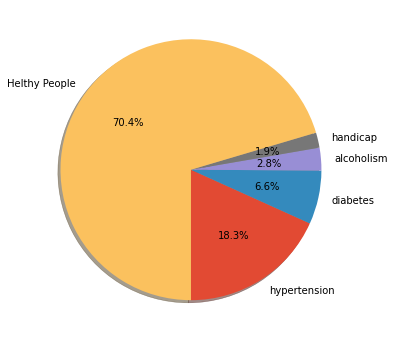

In [33]:
plt.style.use("ggplot")
fig,ax=plt.subplots()
fig.set_size_inches([6,6])
ax.pie(dis11,labels=dis+["Helthy People"],shadow = True,startangle = 270, autopct='%1.1f%%')
plt.show()

In [34]:
med.describe()

,age,waited_days
count,110521.000000,110521.000000
mean,37.089386,10.184345
std,23.109885,15.255153
min,0.000000,0.000000
25%,18.000000,0.000000
50%,37.000000,4.000000
75%,55.000000,15.000000
max,115.000000,179.000000


In [35]:
gender_population=med["gender"].value_counts().values
gender_population

array([71836, 38685])

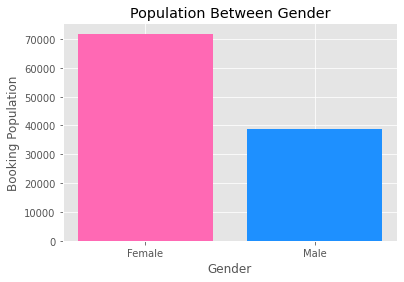

In [36]:
fig,ax=plt.subplots()
ax.bar("Female",gender_population[0],color="hotpink")
ax.bar("Male",gender_population[1],color="dodgerblue")
ax.set_xlabel("Gender")
ax.set_ylabel("Booking Population")
ax.set_title("Population Between Gender")
plt.show()

In [37]:
scholarship_population=med["scholarship"].value_counts().values
scholarship_population

array([99660, 10861])

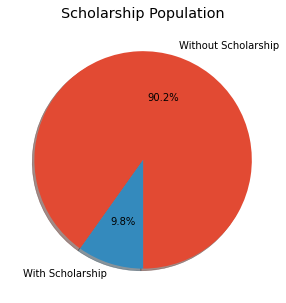

In [38]:
fig,ax=plt.subplots()
fig.set_size_inches([5,5])
ax.pie(scholarship_population,labels=["Without Scholarship","With Scholarship"],shadow = True,startangle = 270, autopct='%1.1f%%')
ax.set_title("Scholarship Population")
plt.show()

In [39]:
sms=med["sms_received"].value_counts().values
sms

array([75039, 35482])

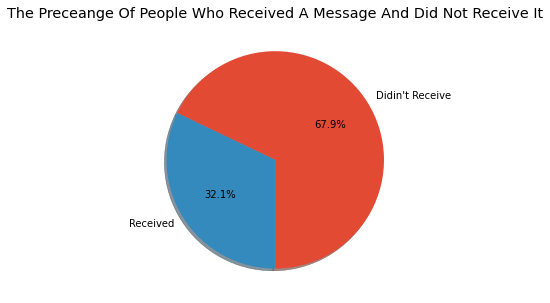

In [40]:
fig,ax=plt.subplots()
fig.set_size_inches([7,5])
ax.pie(sms,labels=["Didin't Receive","Received"],shadow = True,startangle = 270, autopct='%1.1f%%')
ax.set_title("The Preceange Of People Who Received A Message And Did Not Receive It")
plt.show()

In [41]:
show=med["attendees"].value_counts().values
show

array([88207, 22314])

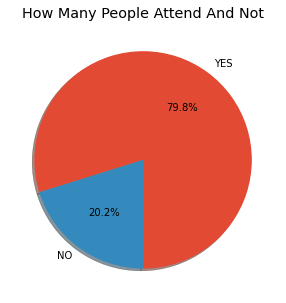

In [42]:
fig,ax=plt.subplots()
fig.set_size_inches([7,5])
ax.pie(show,labels=["YES","NO"],shadow = True,startangle = 270, autopct='%1.1f%%')
ax.set_title("How Many People Attend And Not")
plt.show()

In [43]:
generation=med["age_group"].value_counts()
generation

Yoth             31899
Seniors          30072
Kids and Teen    27378
Elders           21167
Name: age_group, dtype: int64

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  after removing the cwd from sys.path.


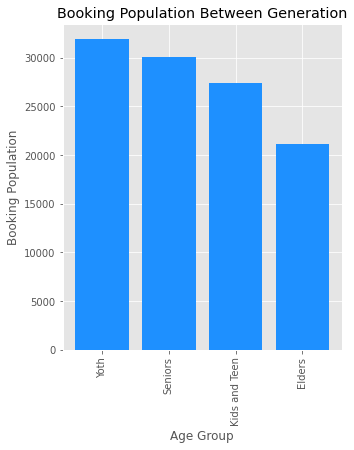

In [44]:
fig,ax=plt.subplots()
fig.set_size_inches([5,6])
ax.bar(generation.index,generation,color="dodgerblue")
ax.set_xticklabels(generation.index,rotation=90)
ax.set_xlabel("Age Group")
ax.set_ylabel("Booking Population")
ax.set_title("Booking Population Between Generation")
plt.show()

In [45]:
book=med["day_name_booked"].value_counts()
book

Tuesday      26167
Wednesday    24259
Monday       23084
Friday       18915
Thursday     18072
Saturday        24
Name: day_name_booked, dtype: int64

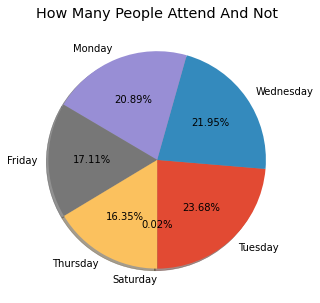

In [46]:
fig,ax=plt.subplots()
fig.set_size_inches([7,5])
ax.pie(book,labels=book.index,shadow = True,startangle = 270, autopct='%1.2f%%')
ax.set_title("How Many People Attend And Not")
plt.show()

In [47]:
appointment=med["day_name_appointment"].value_counts()
appointment

Wednesday    25866
Tuesday      25638
Monday       22713
Friday       19019
Thursday     17246
Saturday        39
Name: day_name_appointment, dtype: int64

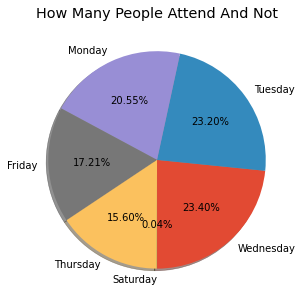

In [48]:
fig,ax=plt.subplots()
fig.set_size_inches([7,5])
ax.pie(appointment,labels=appointment.index,shadow = True,startangle = 270, autopct='%1.2f%%')
ax.set_title("How Many People Attend And Not")
plt.show()

**My Conclusion For This Section:**

1-The avg age of pepole who booked appointment is 37 years old.

2-The avg waited days between scheduled day and appointment day is 10 days.

3-Most people around 70% don't suffer from any chronic diseases or handicap or alcoholism, the rest of the people suffers in the first place from hypertencion then diabetes then alcoholism then handicap.

4-Female is the most gender who booked appointment then male.

5-Less than 10% of patients have scholarship.

6-Only one third of patients who received reminder message.

7-The most age group who booked is yoth (from 18 to 40) then seniors (from 40 to 60) then kids and teen (from newborn to 17) then elders from (60 to above).

8- 20% of the patints who booked didn't come !

9-The precentage of booked appointment and appointment day between week days almost the same except saturday.


2. **Figure out why some patients didn't show up?**

First of all we should think firstly about the factors which helped the patients didn't show up

1-Is the gender factor? 

2-Is the waited days factor?

3-Is the age group factor? 

4-Is the scholarship factor?

5-Is the chronic diseas and alchol and handicap factor?

6-Is the sending sms factor?

7-Is the specific days of the week factor?

In [49]:
gen=med.groupby("gender")["attendees"].value_counts()
gen

gender  attendees
F       True         57245
        False        14591
M       True         30962
        False         7723
Name: attendees, dtype: int64

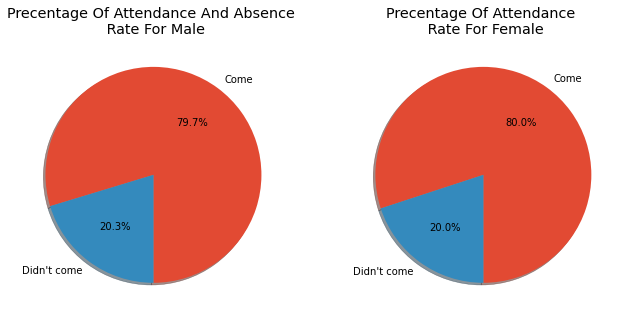

In [50]:
fig,ax=plt.subplots(1,2)
fig.set_size_inches(10,10)
ax[0].pie(gen["F"],labels=["Come","Didn't come"],shadow = True,startangle = 270, autopct='%1.1f%%')
ax[1].pie(gen["M"],labels=["Come","Didn't come"],shadow = True,startangle = 270, autopct='%1.1f%%')
ax[0].set_title("Precentage Of Attendance And Absence \n Rate For Male")
ax[1].set_title("Precentage Of Attendance \n Rate For Female")
fig.tight_layout(pad=6.0)
plt.show()

I don't think that the gender is effective factor as shown from the previous two plots because the two precentage almost same.

In [51]:
wd=(med.loc[(med["waited_days"]<20)].groupby("waited_days")["attendees"].value_counts(normalize=True)*100).reset_index(name="Precent")
edd=wd.loc[(wd["attendees"]==False)]
edd

,waited_days,attendees,Precent
1,0,False,4.647062
3,1,False,21.350470
5,2,False,23.821561
7,3,False,23.529412
9,4,False,23.270321
11,5,False,26.609704
13,6,False,24.795640
15,7,False,26.681614
17,8,False,28.730703
19,9,False,27.414330


Note:

I specify the waited days less than 20 days because it's the normal waited days more than that would be surgery or cheakup or birth process but it's not a normal appointment

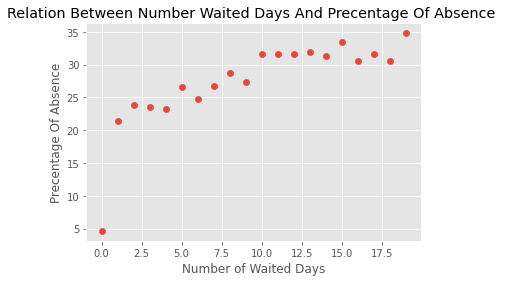

In [52]:
 ig,ax=plt.subplots()
ax.scatter(edd["waited_days"],edd["Precent"],s=40)
ax.set_title("Relation Between Number Waited Days And Precentage Of Absence ")
ax.set_xlabel("Number of Waited Days")
ax.set_ylabel("Precentage Of Absence")
plt.show()

The precentage of absence increace as waited days increase as shown in the previous plot.

In [53]:
age=(med.groupby("age_group")["attendees"].value_counts(normalize=True)*100).reset_index(name="Precent")
age2=age[age["attendees"]==False].sort_values("Precent",ascending=False)
age2

,age_group,attendees,Precent
3,Yoth,False,23.264052
1,Kids and Teen,False,21.900796
5,Seniors,False,18.808194
7,Elders,False,15.297397


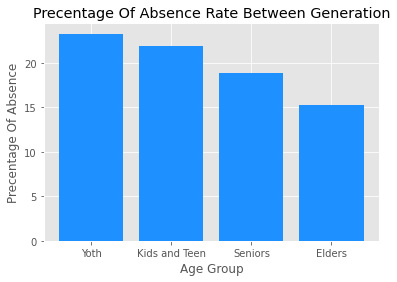

In [54]:
fig,ax=plt.subplots()
ax.bar(age2["age_group"],age2["Precent"],color="dodgerblue")
ax.set_xlabel("Age Group")
ax.set_ylabel("Precentage Of Absence")
ax.set_title("Precentage Of Absence Rate Between Generation")
plt.show()

The yoth are the most age group don't show up although they are the most age group books appointments.

In [55]:
ss=(med.groupby("scholarship")["attendees"].value_counts(normalize=True)*100).reset_index(name="Precent")
ss2=ss[ss["attendees"]==False].sort_values("Precent",ascending=False)
ss2

,scholarship,attendees,Precent
3,True,False,23.736304
1,False,False,19.803331


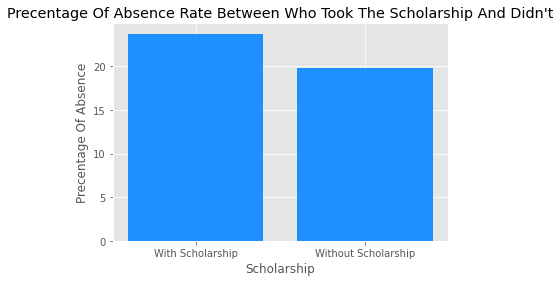

In [56]:
fig,ax=plt.subplots()
ax.bar(["With Scholarship","Without Scholarship"],ss2["Precent"],color="dodgerblue")
ax.set_xlabel("Scholarship")
ax.set_ylabel("Precentage Of Absence")
ax.set_title("Precentage Of Absence Rate Between Who Took The Scholarship And Didn't")
plt.show()

Contrary to expected that the patients who have scholarship their absence precentage is more than patients who don't have scholarship 

soo i don't think the scholarship is effictive factor.

In [57]:
hyp=(med[med["hypertension"]==True]["attendees"].value_counts(normalize=True)*100)[False]
dip=(med[med["diabetes"]==True]["attendees"].value_counts(normalize=True)*100)[False]
alc=(med[med["alcoholism"]==True]["attendees"].value_counts(normalize=True)*100)[False]
hc=(med[med["handicap"]==True]["attendees"].value_counts(normalize=True)*100)[False]

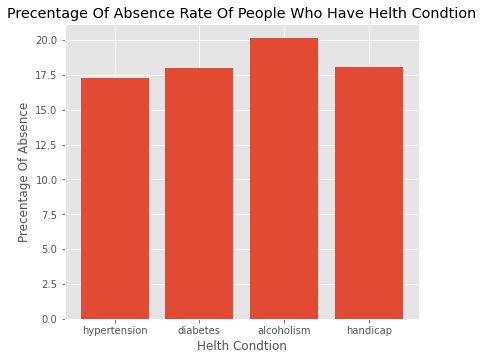

In [58]:
fig,ax=plt.subplots()
fig.set_size_inches(7,6)
ax.bar(dis,[hyp,dip,alc,hc])
fig.tight_layout(pad=6.0)
ax.set_xlabel("Helth Condtion")
ax.set_ylabel("Precentage Of Absence")
ax.set_title("precentage of Absence Rate of people who have helth condtion".title())
plt.show()

Alcholic people they are the most group who don't show up.

In [59]:
sm=(med.groupby("sms_received")["attendees"].value_counts(normalize=True)*100).reset_index(name="precenage")
sm2=sm[sm["attendees"]==False]
sm2

,sms_received,attendees,precenage
1,False,False,16.697984
3,True,False,27.574545


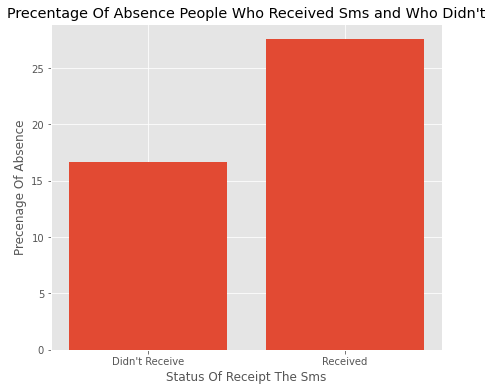

In [60]:
fig,ax=plt.subplots()
fig.set_size_inches(7,6)
ax.bar(["Didn't Receive","Received"],sm2["precenage"])
ax.set_xlabel("Status Of Receipt The Sms")
ax.set_ylabel("Precenage Of Absence")
ax.set_title("Precentage Of Absence People Who Received Sms and Who Didn't")
plt.show()

Contrary to expected too that the patients who received sms their precentage of absence more than the people who didn't receive sms.

Note:

We can show the powerful of sms but in diffrent way that we will show the relation between the waited days and sms with the attendees of course and that's we will do in the next two cells.

In [61]:
sms1=(med.groupby(["sms_received","waited_days"])["attendees"].value_counts(normalize=True)*100)[False].reset_index(name="Precentage")
sms2=sms1.loc[(sms1["attendees"]==False)]
sms2

,waited_days,attendees,Precentage
1,0,False,4.647062
3,1,False,21.350470
5,2,False,23.821561
7,3,False,24.631349
9,4,False,24.373882
...,...,...,...
198,133,False,36.363636
199,155,False,100.000000
201,162,False,18.181818
204,176,False,33.333333


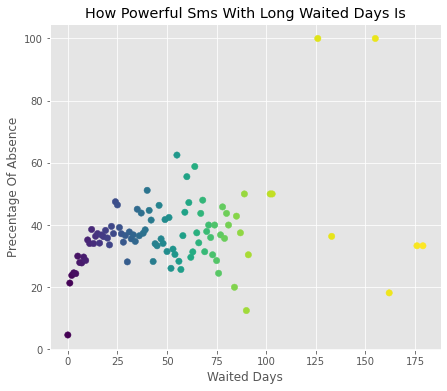

In [62]:
fig,ax=plt.subplots()
fig.set_size_inches(7,6)
ax.scatter(sms2["waited_days"],sms2["Precentage"],s=40,c=sms2.index,cmap='viridis')
ax.set_title("How Powerful Sms With Long Waited Days Is")
ax.set_xlabel("Waited Days")
ax.set_ylabel("Precentage Of Absence")
plt.show()


As show from the previous plot that as waited days geting longer and without receiving any sms precentage of absence increace untill some **point** of waited days the precentage become lower or as the plot want to say that these patients knows thier appointment and dont't need reminder.

Note:

This point is the point when the waited days become more than useal and that's mean it's not a normal appointment it's surgery or cheak up or birth process as we assumed before.

In [63]:
med.groupby(["day_name_appointment"])["attendees"].value_counts()

day_name_appointment  attendees
Friday                True         14982
                      False         4037
Monday                True         18024
                      False         4689
Saturday              True            30
                      False            9
Thursday              True         13909
                      False         3337
Tuesday               True         20488
                      False         5150
Wednesday             True         20774
                      False         5092
Name: attendees, dtype: int64

In [64]:
dayss=(med.groupby(["day_name_appointment"])["attendees"].value_counts(normalize=True)*100).reset_index(name="precentage")
dayss2=dayss[dayss["attendees"]==False]
dayss2

,day_name_appointment,attendees,precentage
1,Friday,False,21.226142
3,Monday,False,20.644565
5,Saturday,False,23.076923
7,Thursday,False,19.349414
9,Tuesday,False,20.087370
11,Wednesday,False,19.686074


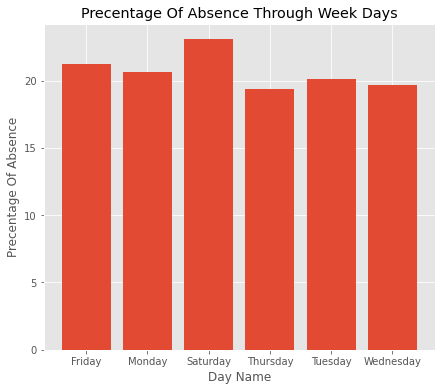

In [65]:
fig,ax=plt.subplots()
fig.set_size_inches(7,6)
ax.bar(dayss2["day_name_appointment"],dayss2["precentage"])
ax.set_xlabel("Day Name")
ax.set_ylabel("Precentage Of Absence")
ax.set_title("Precentage Of Absence Through Week Days")
plt.show()

The all days'precenage are alomest the same so i don't think that there is relation.

# Cocnlusion:

1. The waited days is strong factor which is affect in the precentage of absence so i highly recommend to reduce the gap between the scheduled day appointment day as much as possibl.

2. Youth and kids and teen they are the most two group absent to thier appointment maybe they mess their appointments because of work or school i can't actually answer why they miss the appointments beacuse the most data is catigorical.

3. Alcholic people they are the most group who don't show up maybe they need more reminder or make their apoointments in morning.

4. Sms reminder is the most powerful factor makes patients come.